In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pwd

/aiffel/aiffel/02_data_cleaning/day2


In [3]:
pd.set_option('display.max_columns', 100)

# 0. 데이터 읽어오기

In [4]:
# car_df = pd.read_csv('/aiffel/data/cars.csv')
car_df = pd.read_csv('cars.csv')

In [5]:
# brand_df = pd.read_csv('/aiffel/data/brand.csv')
brand_df = pd.read_csv('brand.csv')

In [6]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


In [7]:
# title 의 횟수 확인
car_df['title'].value_counts()

VAUXHALL CORSA                                   223
FORD FOCUS                                       162
VAUXHALL ASTRA                                   155
FORD FIESTA                                      128
BMW 3 SERIES                                     119
                                                ... 
PROTON PROTON                                      1
ABARTH FIAT 595 1.4 TJET (165PS) SCORPIONEORO      1
KIA STONIC                                         1
TOYOTA PRIUS+                                      1
HONDA PRELUDE                                      1
Name: title, Length: 455, dtype: int64

In [8]:
brand_df

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States
5,volvo,Sweden
6,peugeot,France
7,bmw,Germany
8,citroen,France
9,mercedes-benz,Germany


In [9]:
# brand_df의 title에 중복값이 있는지 확인
# brand_df['title'].value_counts()
brand_df['title'][brand_df['title'].duplicated()]

Series([], Name: title, dtype: object)

## 1. cars.csv와 brand.csv의 데이터 합치기
[힌트] cars.csv의 title 변수로부터 브랜드 데이터를 추출할 수 있습니다.

car_df의 title의 공백 앞 부분이 브랜드 명으로 brand_df의 title과 같은 것으로 보임. 대소문자 처리가 필요

In [10]:
# car_df의 title 앞 부분만 가져와서 brand 컬럼으로 맨 앞에 추가
car_df.insert(0, 'brand', car_df['title'].str.split().str[0].str.lower())
car_df

,brand,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,skoda,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,vauxhall,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,hyundai,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,mini,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,vauxhall,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,renault,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,audi,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,bmw,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,honda,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


In [11]:
# 데이터 합치기 전에 brand_df 에서 title 컬럼을  brand 로 변경해서 컬럼명 통일
brand_df.rename({'title':'brand'}, axis=1,inplace=True)

In [12]:
df = car_df.merge(brand_df, on='brand', how='left')
df

,brand,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,vauxhall,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,hyundai,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea
3,mini,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,vauxhall,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,renault,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,France
3683,audi,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,Germany
3684,bmw,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,Germany
3685,honda,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,Japan


## 2. 카테고리형 변수를 숫자 형태로 변환하기

[힌트] Engine, Emission Class 변수에 주목하세요!

Engine: 1.4L, Emission Class: Euro 6 변수 포맷에서 각각 맨 뒤에 'L', 맨 앞에 'Euro ' 단위를 빼고 나머지 숫자만 숫자 형태로 변환 처리 진행

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              3687 non-null   object 
 1   title              3687 non-null   object 
 2   Price              3687 non-null   int64  
 3   Mileage(miles)     3687 non-null   int64  
 4   Registration_Year  3687 non-null   int64  
 5   Previous Owners    2276 non-null   float64
 6   Fuel type          3687 non-null   object 
 7   Body type          3687 non-null   object 
 8   Engine             3642 non-null   object 
 9   Gearbox            3687 non-null   object 
 10  Doors              3662 non-null   float64
 11  Seats              3652 non-null   float64
 12  Emission Class     3600 non-null   object 
 13  Service history    540 non-null    object 
 14  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 460.9+ KB


#### 변수 타입
Price, Mileage(miles), Registration_Year : int64<br>
Previous Owners, Doors, Seats: float64<br>
나머지 변수: object

In [14]:
# 맨 뒤의 'L' 단위 제거
# df['Engine'] = df['Engine'].str.rstrip('L')
df['Engine'] = df['Engine'].str[:-1]
df['Engine']

0       1.4
1       1.2
2       1.4
3       1.4
4       1.3
       ... 
3682    1.6
3683    2.0
3684    2.0
3685    2.2
3686    1.2
Name: Engine, Length: 3687, dtype: object

In [15]:
# 숫자형으로 변환
# df['Engine'] = df['Engine'].astype('float')
df['Engine'] = pd.to_numeric(df['Engine'])
df['Engine']

0       1.4
1       1.2
2       1.4
3       1.4
4       1.3
       ... 
3682    1.6
3683    2.0
3684    2.0
3685    2.2
3686    1.2
Name: Engine, Length: 3687, dtype: float64

In [16]:
# Emission Class 컬럼에서 Euro 앞부분을 제거하고 숫자형 처리
# df['Emission Class'] = df['Emission Class'].str.lstrip('Euro ')
df['Emission Class'] = pd.to_numeric(df['Emission Class'].str[-1]).astype('Int64')
df['Emission Class']

0       6
1       4
2       5
3       4
4       5
       ..
3682    4
3683    5
3684    5
3685    4
3686    5
Name: Emission Class, Length: 3687, dtype: Int64

In [17]:
# Doors, Seats 수도 정수로 떨어지는 피처이므로 int형으로 변환
df['Doors'] = pd.to_numeric(df['Doors']).astype('Int64')
df['Seats'] = pd.to_numeric(df['Seats']).astype('Int64')
df['Previous Owners'] = pd.to_numeric(df['Previous Owners']).astype('Int64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              3687 non-null   object 
 1   title              3687 non-null   object 
 2   Price              3687 non-null   int64  
 3   Mileage(miles)     3687 non-null   int64  
 4   Registration_Year  3687 non-null   int64  
 5   Previous Owners    2276 non-null   Int64  
 6   Fuel type          3687 non-null   object 
 7   Body type          3687 non-null   object 
 8   Engine             3642 non-null   float64
 9   Gearbox            3687 non-null   object 
 10  Doors              3662 non-null   Int64  
 11  Seats              3652 non-null   Int64  
 12  Emission Class     3600 non-null   Int64  
 13  Service history    540 non-null    object 
 14  country            3687 non-null   object 
dtypes: Int64(4), float64(1), int64(3), object(7)
memory usage: 475.3+ KB


#### 변수 타입
Price, Mileage(miles), Registration_Year, Emission Class, Doors, Seats, Previous Owners : int64<br>
Engine: float64<br>
나머지 변수: object

## 3. 결측치 처리하기
[힌트] Service history 변수의 결측치는 'Unknown'으로 채우고, 결측치 변수가 일정 개수 이상 포함된 데이터는 제거합니다.

데이터 분포를 이해를 위해 결측치 파악 및 각 숫자형 변수에 대해 scatterplot을 그려보고 이상치 제거 시행해보자.

In [19]:
df.nunique()

brand                  48
title                 455
Price                 866
Mileage(miles)       1570
Registration_Year      40
Previous Owners         9
Fuel type               6
Body type              10
Engine                 34
Gearbox                 2
Doors                   4
Seats                   6
Emission Class          6
Service history         1
country                12
dtype: int64

In [20]:
# 결측치 처리 전 country로 groupby 후 title 컬럼의 고유값을 확인
df.groupby('country')['title'].nunique().sort_values(ascending=False)

country
Japan             102
Germany            91
France             64
United Kingdom     63
United States      41
South Korea        33
Italy              24
Sweden             13
Czech Republic     11
Spain               6
Romania             5
Malaysia            2
Name: title, dtype: int64

In [21]:
df.isna().sum()

brand                   0
title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
country                 0
dtype: int64

#### (1) Service history

In [22]:
# 문제에서 제시한 대로 Service history 변수의 결측치는 'Unknown'으로 채우기
df_cleaned = df.copy()
df_cleaned['Service history'] = df_cleaned['Service history'].fillna('Unknown')
df_cleaned['Service history']

0       Unknown
1          Full
2       Unknown
3          Full
4       Unknown
         ...   
3682    Unknown
3683    Unknown
3684    Unknown
3685       Full
3686    Unknown
Name: Service history, Length: 3687, dtype: object

#### (2) Previous Owners

In [23]:
# 가장 결측치가 많은 Previous Owners 컬럼 확인
df_cleaned[df_cleaned['Previous Owners'].isna()]

,brand,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
2,hyundai,HYUNDAI I30,949,137000,2011,<NA>,Petrol,Hatchback,1.4,Manual,5,5,5,Unknown,South Korea
4,vauxhall,VAUXHALL CORSA,1000,85000,2013,<NA>,Diesel,Hatchback,1.3,Manual,5,5,5,Unknown,United Kingdom
6,ford,FORD FOCUS,798,140599,2008,<NA>,Petrol,Hatchback,1.6,Manual,5,5,4,Unknown,United States
7,vauxhall,VAUXHALL CORSA,1995,90000,2009,<NA>,Petrol,Hatchback,1.2,Manual,3,5,4,Unknown,United Kingdom
8,volvo,VOLVO 740,750,225318,2025,<NA>,Petrol,Estate,2.3,Automatic,5,<NA>,<NA>,Unknown,Sweden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,rover,ROVER 800,3975,34000,1995,<NA>,Petrol,Saloon,2.7,Automatic,4,<NA>,<NA>,Unknown,United Kingdom
3680,citroen,CITROEN C3,1795,85962,2009,<NA>,Diesel,Hatchback,1.4,Manual,5,5,4,Unknown,France
3683,audi,AUDI A4,6990,119000,2012,<NA>,Petrol,Saloon,2.0,Manual,4,5,5,Unknown,Germany
3684,bmw,BMW 3 SERIES,3995,139000,2013,<NA>,Diesel,Saloon,2.0,Manual,4,5,5,Unknown,Germany


In [24]:
# Previous Owners가 null인 행을 임의의 결측치로 채울 때 결과에 영향이 있을 소지가 있어, 해당 컬럼을 전체 삭제
df_cleaned = df_cleaned.dropna(subset=['Previous Owners'])

<AxesSubplot:ylabel='Previous Owners'>

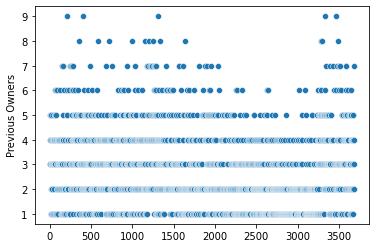

In [25]:
# Previous Owners
sns.scatterplot(x = df_cleaned.index, y = df_cleaned['Previous Owners'])

In [26]:
# 숫자 변수에 대해 scatter plot 그리고 결측치 및 이상치 처리
# Price, Mileage(miles), Registration_Year, Emission Class : int64<br>

#### (3) Price

결측치는 없고 이상치 확인

<AxesSubplot:ylabel='Price'>

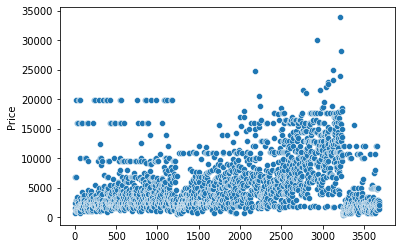

In [27]:
# Previous Owners, Engine, Doors, Seats: float64<br>

#  Price
sns.scatterplot(x = df_cleaned.index, y = df_cleaned['Price'])

#### (4) Mileage(miles)

결측치는 없고 이상치 확인

<AxesSubplot:ylabel='Mileage(miles)'>

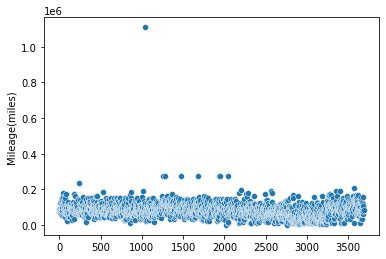

In [28]:
#  Mileage(miles)
sns.scatterplot(x = df_cleaned.index, y = df_cleaned['Mileage(miles)'])

<AxesSubplot:ylabel='Mileage(miles)'>

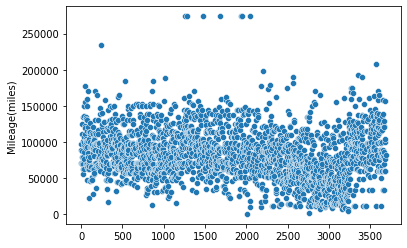

In [29]:
# Mileage(miles) 이상치 제거 후 그려보기
df_cleaned = df_cleaned.drop(index=df_cleaned[df_cleaned['Mileage(miles)'] > 1e6].index)
sns.scatterplot(x = df_cleaned.index, y = df_cleaned['Mileage(miles)'])

In [30]:
# # 2개 이하의 너무 적은 수의 브랜드는 others로 처리
# for column in df_cleaned.columns:
#     # 각 컬럼의 값별 빈도 계산
#     value_counts = df_cleaned[column].value_counts()
#     # 빈도가 2 이하인 값을 "other"로 변경
#     rare_values = value_counts[value_counts <= 2].index
#     df_cleaned[column] = df_cleaned[column].apply(lambda x: 'other' if x in rare_values else x)

# print(df_cleaned)

#### (5) Registration_Year

<AxesSubplot:ylabel='Registration_Year'>

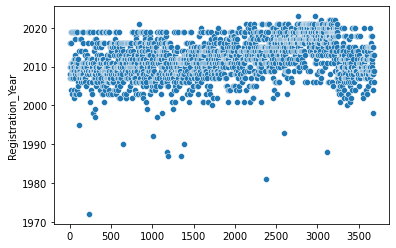

In [31]:
# Registration_Year
sns.scatterplot(x = df_cleaned.index, y = df_cleaned['Registration_Year'])

In [32]:
# 현재년도인 2024년까지 데이터만 선택
df_cleaned = df_cleaned[df_cleaned['Registration_Year'] <= 2024]

In [33]:
# 1980년 이전 데이터는 확인
df_cleaned[df_cleaned['Registration_Year'] <= 1980]

,brand,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
237,mg,MG MIDGET,1875,75043,1972,3,Petrol,Convertible,1.3,Manual,2,<NA>,<NA>,Unknown,United Kingdom


In [34]:
# row에 결측치가 많아 의미 없는 데이터로 판단, 삭제 진행
df_cleaned = df_cleaned[df_cleaned['Registration_Year'] > 1980]

<AxesSubplot:ylabel='Registration_Year'>

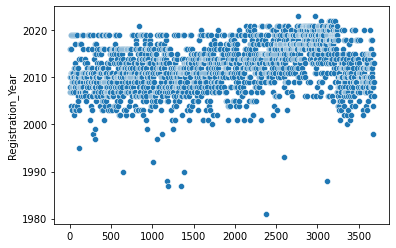

In [35]:
# Registration_Year 다시 plotting
sns.scatterplot(x = df_cleaned.index, y = df_cleaned['Registration_Year'])

In [36]:
# 다시 결측치 확인
df_cleaned.isna().sum()

brand                 0
title                 0
Price                 0
Mileage(miles)        0
Registration_Year     0
Previous Owners       0
Fuel type             0
Body type             0
Engine               10
Gearbox               0
Doors                18
Seats                19
Emission Class       31
Service history       0
country               0
dtype: int64

In [37]:
# # 1개 결측치 threshold 확인
# df_cleaned.dropna(thresh=len(df_cleaned.columns) - 1)

In [38]:
df_cleaned[df_cleaned['Engine'].isna()]

,brand,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
679,bmw,BMW 3 SERIES,4200,68060,2007,1,Petrol,Saloon,NaN,Automatic,<NA>,<NA>,<NA>,Full,Germany
835,toyota,TOYOTA MARK X,7500,77000,2021,3,Petrol,Saloon,NaN,Automatic,<NA>,<NA>,<NA>,Unknown,Japan
856,nissan,NISSAN CUBIC,4500,47000,2007,3,Petrol,Hatchback,NaN,Manual,<NA>,<NA>,<NA>,Unknown,Japan
1304,mazda,MAZDA MAZDA6,1500,155670,2015,1,Diesel,Estate,NaN,Manual,<NA>,<NA>,<NA>,Unknown,Japan
1533,citroen,CITROEN C1,3900,71000,2015,3,Petrol,Hatchback,NaN,Manual,<NA>,<NA>,<NA>,Unknown,France
1619,ford,FORD KA,2490,68837,2007,4,Petrol,Hatchback,NaN,Manual,<NA>,<NA>,<NA>,Full,United States
2022,audi,AUDI A3,5750,139225,2012,3,Diesel,Hatchback,NaN,Automatic,<NA>,<NA>,<NA>,Unknown,Germany
2523,fiat,FIAT 500L,5250,79308,2015,1,Diesel,MPV,NaN,Automatic,<NA>,<NA>,<NA>,Full,Italy
2719,vauxhall,VAUXHALL ASTRA GTC,5995,76000,2014,3,Diesel,Coupe,NaN,Manual,<NA>,<NA>,<NA>,Unknown,United Kingdom
3031,vauxhall,VAUXHALL AMPERA,9499,65767,2014,1,Petrol Plug-in Hybrid,Hatchback,NaN,Automatic,5,4,5,Unknown,United Kingdom


In [39]:
# Engine, Doors, Seats, Emission Class 4개 변수가 모두 결측치인 데이터 제거
df_cleaned = df_cleaned.dropna(subset=['Engine', 'Doors', 'Seats', 'Emission Class'], how='all')
df_cleaned

,brand,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,SKODA FABIA,6900,70189,2016,3,Diesel,Hatchback,1.4,Manual,5,5,6,Unknown,Czech Republic
1,vauxhall,VAUXHALL CORSA,1495,88585,2008,4,Petrol,Hatchback,1.2,Manual,3,5,4,Full,United Kingdom
3,mini,MINI HATCH,2395,96731,2010,5,Petrol,Hatchback,1.4,Manual,3,4,4,Full,United Kingdom
5,hyundai,HYUNDAI COUPE,800,124196,2007,3,Petrol,Coupe,2.0,Manual,3,4,4,Unknown,South Korea
9,peugeot,PEUGEOT 207,1299,87000,2008,5,Diesel,Hatchback,1.6,Manual,5,5,4,Unknown,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,jeep,JEEP CHEROKEE,2750,100000,2004,3,Petrol,SUV,3.7,Automatic,5,5,3,Unknown,United States
3679,honda,HONDA PRELUDE,2475,156097,1998,2,Petrol,Coupe,2.2,Automatic,2,4,2,Full,Japan
3681,nissan,NISSAN QASHQAI,1695,104000,2009,3,Petrol,Hatchback,1.6,Manual,5,5,4,Unknown,Japan
3682,renault,RENAULT MEGANE,1395,76202,2006,4,Petrol,Hatchback,1.6,Manual,5,5,4,Unknown,France


In [40]:
# 다시 결측치 확인
df_cleaned.isna().sum()

brand                 0
title                 0
Price                 0
Mileage(miles)        0
Registration_Year     0
Previous Owners       0
Fuel type             0
Body type             0
Engine                1
Gearbox               0
Doors                 9
Seats                10
Emission Class       22
Service history       0
country               0
dtype: int64

#### (6) Engine

In [41]:
df_cleaned[df_cleaned['Engine'].isna()]

,brand,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
3031,vauxhall,VAUXHALL AMPERA,9499,65767,2014,1,Petrol Plug-in Hybrid,Hatchback,NaN,Automatic,5,4,5,Unknown,United Kingdom


In [42]:
df_cleaned['Engine'].describe()

count    2264.000000
mean        1.605963
std         0.468433
min         0.800000
25%         1.300000
50%         1.600000
75%         2.000000
max         6.300000
Name: Engine, dtype: float64

In [43]:
# 'Engine' 컬럼의 결측치를 각 컬럼의 중앙값으로 채우기
df_cleaned['Engine'] = df_cleaned['Engine'].fillna(df_cleaned['Engine'].median())


<AxesSubplot:ylabel='Engine'>

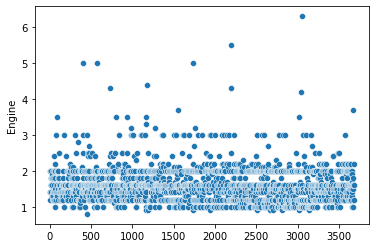

In [44]:
sns.scatterplot(x = df_cleaned.index, y = df_cleaned['Engine'])

In [45]:
#### (7) Doors

<AxesSubplot:ylabel='Doors'>

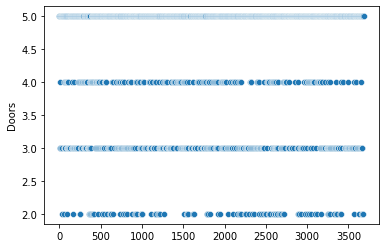

In [46]:
# Doors
sns.scatterplot(x = df_cleaned.index, y = df_cleaned['Doors'])

In [47]:
# 'Doors' 컬럼의 결측치를 각 컬럼의 중앙값으로 채우기
df_cleaned['Doors'] = df_cleaned['Doors'].fillna(df_cleaned['Doors'].median())

In [48]:
#### (8) Seats

<AxesSubplot:ylabel='Seats'>

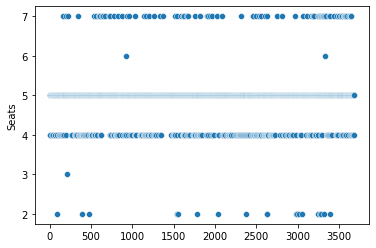

In [49]:
#  Seats
sns.scatterplot(x = df_cleaned.index, y = df_cleaned['Seats'])

In [50]:
# 'Seats' 컬럼의 결측치를 각 컬럼의 중앙값으로 채우기
df_cleaned['Seats'] = df_cleaned['Seats'].fillna(df_cleaned['Seats'].median())

In [51]:
#### (9) Emission Class

<AxesSubplot:ylabel='Emission Class'>

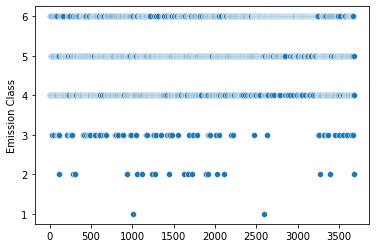

In [52]:
# Emission Class
sns.scatterplot(x = df_cleaned.index, y = df_cleaned['Emission Class'])

In [53]:
df_cleaned['Emission Class'].describe()

count    2243.000000
mean        4.975925
std         0.904124
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         6.000000
Name: Emission Class, dtype: float64

In [54]:
# 'Emission Class'는 범주형 데이터이기 때문에 최빈값(mode)으로 채우기
df_cleaned['Emission Class'] = df_cleaned['Emission Class'].fillna(df_cleaned['Emission Class'].median())

In [55]:
# 다시 결측치 확인
df_cleaned.isna().sum()

brand                0
title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
country              0
dtype: int64

모든 변수에 대해서 결측치 처리 완료.

## 4. Scaler 활용해보기


In [56]:
# Scaling 자동화 하는 기능 사용
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [57]:
df_dummies = pd.get_dummies(df_cleaned, 
                            columns = ['brand', 'Fuel type', 'Body type', 'Gearbox', 'Service history', 'country'],
                            drop_first = True)

df_dummies.drop('title', axis=1, inplace=True)
df_dummies

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,brand_alfa,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_ds,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_infiniti,brand_jaguar,brand_jeep,brand_kia,brand_land,brand_lexus,brand_marcos,brand_maserati,brand_mazda,brand_mercedes-benz,brand_mg,brand_mini,brand_mitsubishi,brand_nissan,brand_peugeot,brand_porsche,brand_proton,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_ssangyong,brand_subaru,brand_suzuki,brand_toyota,brand_vauxhall,brand_volkswagen,brand_volvo,Fuel type_Diesel Hybrid,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Minibus,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Service history_Unknown,country_France,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,6900,70189,2016,3,1.4,5,5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1495,88585,2008,4,1.2,3,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,2395,96731,2010,5,1.4,3,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,800,124196,2007,3,2.0,3,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
9,1299,87000,2008,5,1.6,5,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,2750,100000,2004,3,3.7,5,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3679,2475,156097,1998,2,2.2,2,4,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3681,1695,104000,2009,3,1.6,5,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
3682,1395,76202,2006,4,1.6,5,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


In [58]:
# # 데이터프레임이 df_cleaned라고 가정하고, numeric_cols가 수치형 열 리스트라고 가정
# numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int']).columns

# # 데이터 스케일링
# # ss = StandardScaler()
# scaled_data = ss.fit_transform(df_cleaned[numeric_cols])
# scaled_data

In [59]:
# # 데이터 전처리 (스케일링)
# ss = StandardScaler()
# rs = RobustScaler()
# mm = MinMaxScaler()

In [60]:
df_dummies.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,brand_alfa,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_ds,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_infiniti,brand_jaguar,brand_jeep,brand_kia,brand_land,brand_lexus,brand_marcos,brand_maserati,brand_mazda,brand_mercedes-benz,brand_mg,brand_mini,brand_mitsubishi,brand_nissan,brand_peugeot,brand_porsche,brand_proton,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_ssangyong,brand_subaru,brand_suzuki,brand_toyota,brand_vauxhall,brand_volkswagen,brand_volvo,Fuel type_Diesel Hybrid,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Minibus,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Service history_Unknown,country_France,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,6900,70189,2016,3,1.4,5,5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1495,88585,2008,4,1.2,3,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,2395,96731,2010,5,1.4,3,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,800,124196,2007,3,2.0,3,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
9,1299,87000,2008,5,1.6,5,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


In [61]:
df_dummies.nunique()

Price                      670
Mileage(miles)            1138
Registration_Year           34
Previous Owners              9
Engine                      31
                          ... 
country_South Korea          2
country_Spain                2
country_Sweden               2
country_United Kingdom       2
country_United States        2
Length: 78, dtype: int64

In [62]:
# # fit-transform
# # ss_df = pd.DataFrame(ss.fit_transform(df_dummies), columns=df_dummies.columns)
# X_scaled = ss.fit_transform(df_dummies)

## 5. 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)

In [63]:
from sklearn.decomposition import PCA

In [64]:
# 데이터 스케일링 (PCA를 수행하기 전에 스케일링 수행)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dummies)

# PCA 수행
pca = PCA()
pca.fit(df_scaled)

# 주성분의 설명된 분산 비율 (explained variance ratio)
explained_variance_ratio = pca.explained_variance_ratio_

# 누적 설명된 분산 비율 계산
cumulative_variance = np.cumsum(explained_variance_ratio)

# 누적 분산이 70% 이상인 주성분 개수 찾기
n_components = np.argmax(cumulative_variance >= 0.7) + 1

print(f"누적 분산이 70% 이상이 되는 주성분 개수: {n_components}")

누적 분산이 70% 이상이 되는 주성분 개수: 34


## 6. 국가별 총 브랜드 개수는?

In [65]:
df.columns

Index(['brand', 'title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Doors', 'Seats', 'Emission Class', 'Service history', 'country'],
      dtype='object')

In [66]:
# 원 데이터에 대해 수행
df.groupby('country')['title'].count()

country
Czech Republic     63
France            522
Germany           863
Italy             128
Japan             641
Malaysia            3
Romania            14
South Korea       178
Spain              60
Sweden             47
United Kingdom    729
United States     439
Name: title, dtype: int64

In [67]:
# Cleaning을 수행한 데이터에 대해 수행
df_cleaned.groupby('country')['title'].count()

country
Czech Republic     48
France            347
Germany           549
Italy              66
Japan             382
Malaysia            1
Romania            10
South Korea       113
Spain              33
Sweden             33
United Kingdom    416
United States     267
Name: title, dtype: int64

## 7. 상관관계가 높은 변수들이 있는지 확인해보세요.

In [68]:
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners',
       'Engine', 'Doors', 'Seats', 'Emission Class'],
      dtype='object')

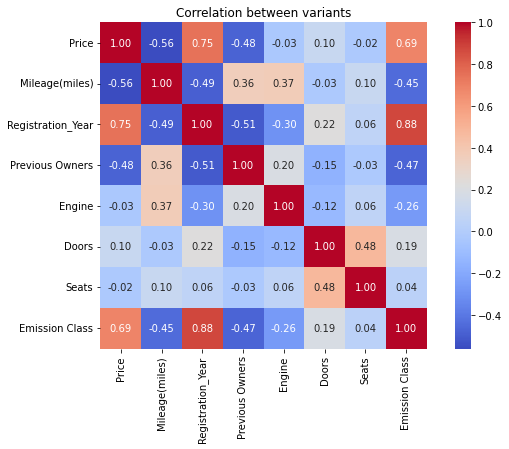

In [69]:
# 모든 숫자형 변수에 상관 관계 계산
correlation = df_cleaned[numeric_cols].corr()

# 상관 관계 행렬 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation between variants')
plt.show()

Price와 Registration_Year (0.75), Emission Class (0.69) 가 상관관계가 높음
Registration_Year와 Emission Class가 상관관계가 높음 (0.88)